In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import geopandas
import seaborn as sns

cost_df = pd.read_csv('./data/cost-of-living.csv', header=0)

print(cost_df.columns)
print(cost_df.shape)
cost_df.head()

#rename 'x54 column'
cost_df.rename(columns={'x54': 'Avg_monthly_salary(USD)'}, inplace=True)

#sort country and city alphabetically
cost_df.sort_values(by=['country', 'city'], ascending=True, inplace=True)

#set No. as index
cost_df.set_index('No.', inplace=True)

cost_df

Index(['No.', 'city', 'country', 'Meal', 'Meal_For_2', 'McDonalds_Meal',
       'Domestic_Beer_Rest(0.5L)', 'Imported_Beer_Rest(0.33L)', 'Cappuccino',
       'Coke/Pepsi', 'Water_Rest(0.33L)', 'Milk', 'Bread', 'Rice', 'Eggs',
       'Cheese', 'Chicken_Fillets', 'Beef', 'Apple', 'Bananas', 'Oranges',
       'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water_Market(1.5L)',
       'Wine_Market', 'Domestic_Beer_Market(0.5L)',
       'Imported_Beer_Market(0.33L)', 'Cigarettes', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'data_quality'],
      dtype='object')
(4874, 59)


,city,country,Meal,Meal_For_2,McDonalds_Meal,Domestic_Beer_Rest(0.5L),Imported_Beer_Rest(0.33L),Cappuccino,Coke/Pepsi,Water_Rest(0.33L),...,x47,x48,x49,x50,x51,x52,x53,Avg_monthly_salary(USD),x55,data_quality
No.,,,,,,,,,,,,,,,,,,,,,
2743,Gardez,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
814,Herat,Afghanistan,1.67,6.11,2.78,2.22,NaN,0.56,0.39,0.11,...,19.45,61.12,38.89,111.13,77.79,461.58,238.47,150.02,10.30,0
1389,Jalalabad,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.90,NaN,NaN,NaN,NaN,NaN,NaN,9.40,0
129,Kabul,Afghanistan,1.67,5.56,3.06,NaN,NaN,0.92,0.22,0.13,...,35.56,107.12,63.90,238.93,144.47,683.44,350.05,192.62,13.88,1
916,Mazar-e Sharif,Afghanistan,1.67,7.73,2.96,NaN,NaN,0.44,0.34,0.15,...,NaN,66.68,33.34,111.13,55.56,277.82,111.13,222.26,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,Karoi,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2702,Masvingo,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,60.00,NaN,300.00,150.00,NaN,582.52,NaN,15.00,0
1746,Mutare,Zimbabwe,7.00,40.00,6.00,1.30,2.0,2.20,0.72,0.47,...,51.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,0


/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Independent-Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/mnt/c/Users/Owner/Desktop/Data-engineer/Independent-Project/Independent-Cost-of-living/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


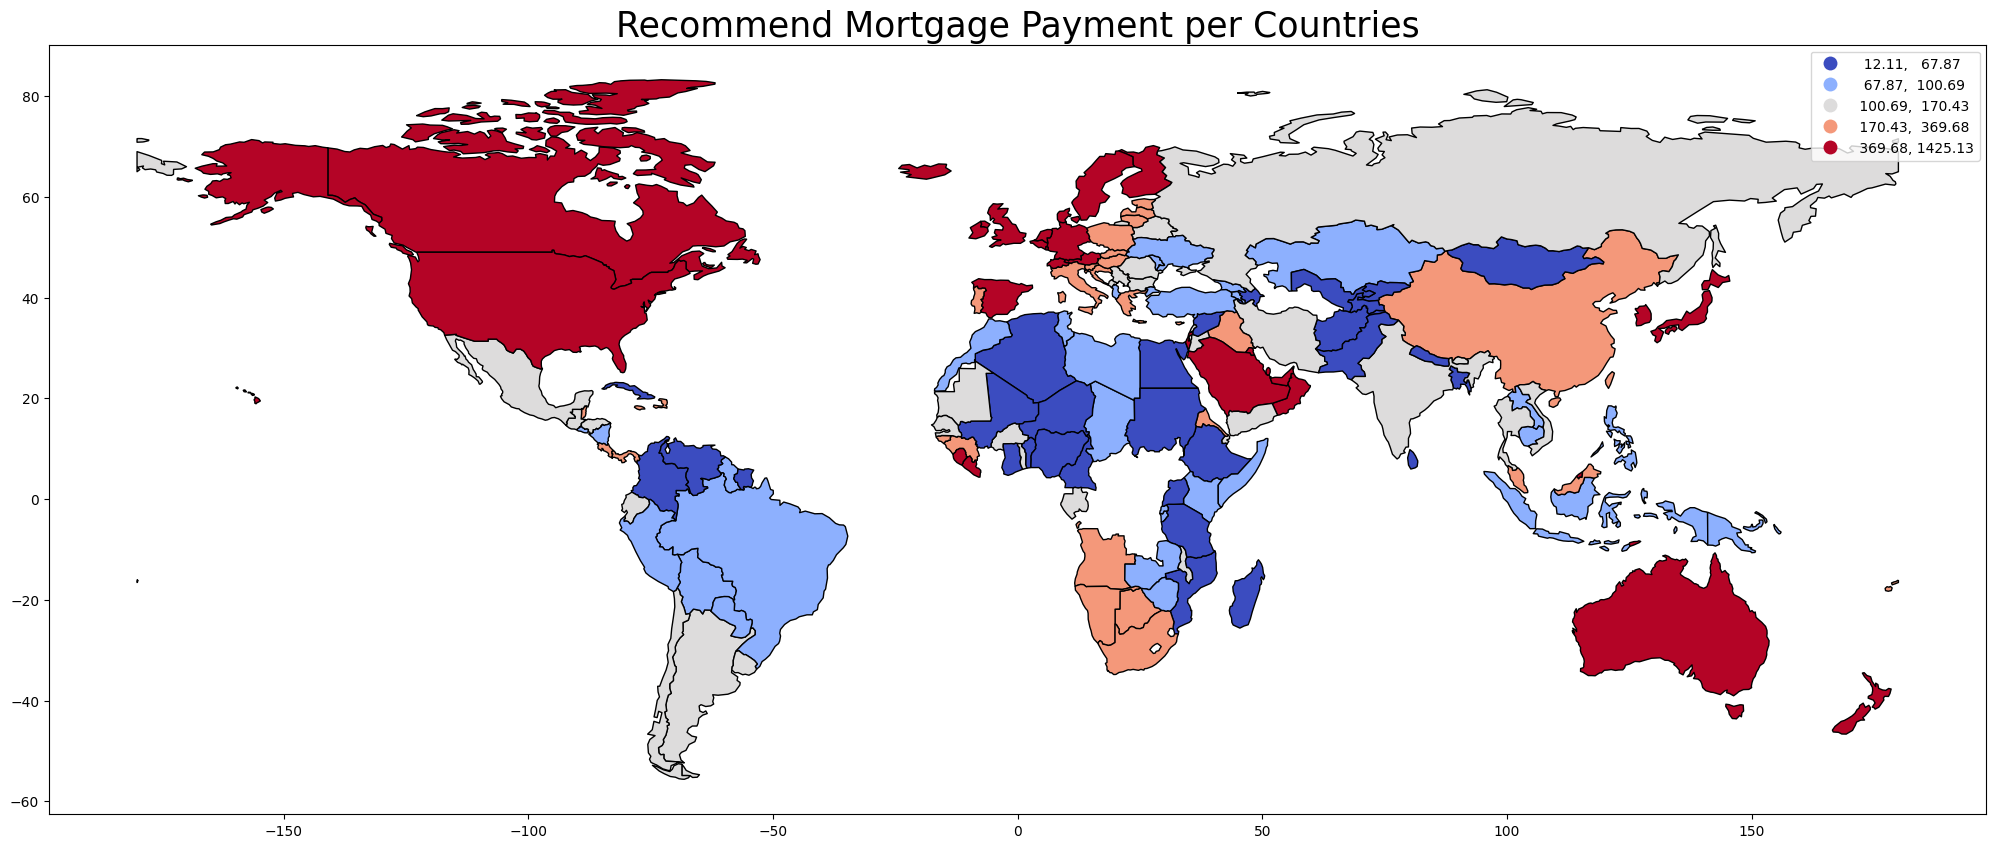

In [48]:
#create mortgage_df to drop Nan on 'Avg_monthly_salary(USD)'
mortgage_df = cost_df.dropna(subset=['Avg_monthly_salary(USD)'])

#calculate the 'Max_Mortgage_Pmt(USD)' based on 'Avg_monthly_salary(USD)'
mortgage_df['Max_Mortgage_Pmt(USD)'] = mortgage_df[['Avg_monthly_salary(USD)']].apply(lambda x: round((x*.25), 2))

#calculate 'Avg_mortgage_pmt' per country in general by
#add 'Avg_mortgage_pmt' column to mortgage_df
mortgage_df['Recommend_mortgage_pmt'] = round(mortgage_df.groupby(by=['country'])[['Max_Mortgage_Pmt(USD)']].transform(np.mean), 2)

#drop all columns except: 
mortgage_df = mortgage_df[['country', 'Avg_monthly_salary(USD)', 'Recommend_mortgage_pmt']]

#drop duplicates for country 
mortgage_df.drop_duplicates(subset='country', inplace=True)

# merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'country', 'CODE', 'gdp_md_est', 'geometry']

#rename US to match the name in world and mortgage_df
def rename_countries(value):
    if value == "United States":
        return 'United States of America'
    else:
        return value
mortgage_df['country'] = mortgage_df['country'].map(rename_countries)

#sort country in world alphabetically
world.sort_values(by=['country'], ascending=True, inplace=True)

# then merge world with our data 
mortgage_geo = pd.merge(world,mortgage_df,on='country')

# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
mortgage_geo = mortgage_geo.merge(location,left_on='country', right_on='name').reset_index()

# plot confirmed cases world map 
mortgage_geo.plot(column='Recommend_mortgage_pmt', scheme="quantiles", edgecolor="black",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')

plt.title('Recommend Mortgage Payment per Countries',fontsize=25)

plt.show()

In [53]:
import folium
from folium.plugins import MarkerCluster

#create interactive world map
world_map = folium.Map(titles = "Recommend Mortgage Payment Per Countries")

marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of mortgage payment
for i in range(len(mortgage_geo)):
    #create arg to pass in marker:
    lat = mortgage_geo.iloc[i]['latitude']
    long = mortgage_geo.iloc[i]['longitude']
    popup_text = """Country: {}<br>
                    Amount(USD): {}<br>"""
    popup_text = popup_text.format(mortgage_geo.iloc[i]['country'],
                                   mortgage_geo.iloc[i]['Recommend_mortgage_pmt'])
    #pass create arg to marker
    folium.Marker(location=[lat, long], popup=popup_text).add_to(marker_cluster)
world_map

In [54]:
tech_salaries_df = pd.read_csv('./data/tech-salaries.csv', header=0)

print(tech_salaries_df.columns)
print(tech_salaries_df.shape)

#drop Nan value in 'annual_base_pay', 'job_title', 'location_country'
tech_salaries_df.dropna(subset=['annual_base_pay', 'job_title', 'location_country'], inplace=True) 

#calculate monthly mortgage payment per_country and job_title by: groupby()
#add result to main df by: transform()
tech_salaries_df['Recom_mortgage_per_job_per_month'] = round(tech_salaries_df.groupby(by=['location_country', 'job_title'])[['annual_base_pay']].transform(lambda x: (x/12)*.25), 2)

tech_salaries_df

Index(['index', 'salary_id', 'employer_name', 'location_name',
       'location_state', 'location_country', 'location_latitude',
       'location_longitude', 'job_title', 'job_title_category',
       'job_title_rank', 'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')
(1655, 19)


,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at,Recom_mortgage_per_job_per_month
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58,2604.17
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58,1354.17
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59,1791.67
5,5,14,casino,eastern oregon,OR,US,38.00,-97.00,it technician,Other,NaN,5.0,1.5,40000.0,0.0,500.0,0,NaN,3/21/16 13:03,833.33
6,6,16,tetra tech,"madison, wi",WI,US,43.10,-89.50,lead interviewer,Other,NaN,4.0,2.5,45000.0,0.0,1500.0,NaN,NaN,3/21/16 13:03,937.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1646,3276,homenet automotive,"exton, pa",PA,US,40.03,-75.63,software engineer i,Software,1,2.0,1.0,60000.0,0.0,10.0,0,NaN,3/23/16 6:59,1250.00
1647,1647,3278,comcast,"philadelphia, pa",PA,US,39.95,-75.16,software engineer,Software,NaN,6.0,2.5,111000.0,5000.0,8.0,~$2000,NaN,3/23/16 7:05,2312.50
1649,1649,3287,mainz brady group - contractor at nike,"beaverton, or",OR,US,45.49,-122.80,front-end developer,Web,NaN,2.0,1.0,50.0,NaN,NaN,none,No paid sick leave or paid vacation.,3/23/16 8:16,1.04
1650,1650,3289,sparkfun electronics,"boulder, co",CO,US,40.02,-105.25,junior software developer,Software,Junior,1.0,0.5,60500.0,0.0,800.0,0,NaN,3/23/16 8:24,1260.42


In [68]:
#read code.csv
code_df = pd.read_csv('./data/codes.csv', header=0)

code_df.head()

#rename alpha-2 CODE
code_df.rename(columns={'Alpha-2 code':'location_country'}, inplace=True)

#remove double quotation mark in a string in location_country, and code columns
code_df['location_country'] = code_df['location_country'].apply(lambda x: eval(x))
code_df['CODE'] = code_df['CODE'].apply(lambda x: eval(x))


#merge tech-salaries and code df
tech_code = tech_salaries_df.merge(code_df, on="location_country").drop(columns=['Latitude (average)', 'Longitude (average)'])

#merge tech_code and morgage_geo:
mortgage_tech = mortgage_geo.merge(tech_code, on='country')
 
mortgage_tech[['country','job_title_category', 'Recom_mortgage_per_job_per_month', 'Recommend_mortgage_pmt']]

#filter by related job in software
filter_software = mortgage_tech[mortgage_tech.job_title_category == "Software"]

#filter by country
filter_country = mortgage_tech[mortgage_tech.country == "Argentina"]
filter_country

,index_x,pop_est,continent,country,CODE_x,gdp_md_est,geometry,Avg_monthly_salary(USD),Recommend_mortgage_pmt,name,...,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at,Recom_mortgage_per_job_per_month,CODE_y,Numeric code
0,4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",413.01,110.73,Argentina,...,0.5,900.0,NaN,NaN,NaN,NaN,3/21/16 17:49,18.75,ARG,"""32"""
1,4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",413.01,110.73,Argentina,...,3.0,32900.0,0.0,0.0,0,Converted from AR$ to USD using an exchange ra...,3/21/16 19:01,685.42,ARG,"""32"""
2,4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",413.01,110.73,Argentina,...,3.0,23200.0,0.0,0.0,0,NaN,3/22/16 5:44,483.33,ARG,"""32"""


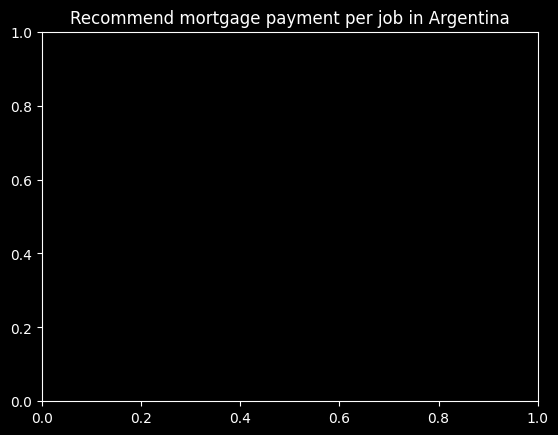

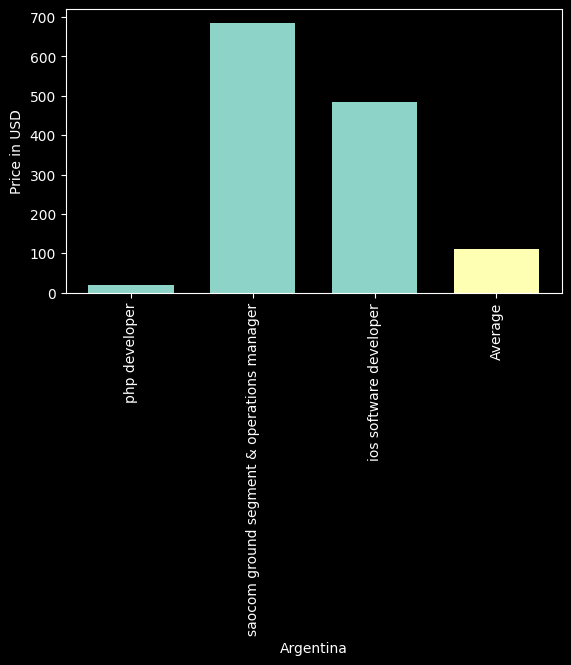

In [89]:
plt.title('Recommend mortgage payment per job in Argentina')

bar_width = 0.7

fig= plt.figure()
# Rotation of the bar names
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.4, top=0.99, wspace=0.99)

plt.bar(filter_country['job_title'], filter_country['Recom_mortgage_per_job_per_month'], width=bar_width)
plt.bar('Average',filter_country['Recommend_mortgage_pmt'], width=bar_width)

plt.xlabel('Argentina')
plt.ylabel('Price in USD')

plt.show()

In [64]:
import folium
from folium.plugins import MarkerCluster

#create interactive world map
world_map = folium.Map(titles = "Recommend Mortgage Payment Per Countries")

marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of mortgage payment
for i in range(len(filter_software)):
    #create arg to pass in marker:
    lat = filter_software.iloc[i]['latitude']
    long = filter_software.iloc[i]['longitude']

    #create HTML text
    htmt_text = f"""
        <h1> {filter_software.iloc[i]['country']} </h1>
        <p> Compare Recommend Mortgage Payment in each country to an actual software related job can afford:</p>
        <ul>
            <li> Recommend Payment: ${filter_software.iloc[i]['Recommend_mortgage_pmt']}</li>
            <li>Actual amount a job can afford: ${filter_software.iloc[i]['Recom_mortgage_per_job_per_month']}</li>
            <li>Difference:${filter_software.iloc[i]['Recommend_mortgage_pmt'] - filter_software.iloc[i]['Recom_mortgage_per_job_per_month']}
            <li>Company: {filter_software.iloc[i]['employer_name']}
        </ul>
                """
    #create the frame:
    iframe = folium.IFrame(html=htmt_text, width=300, height=200)

    popup_text = folium.Popup(iframe, max_width=2650)
    #pass created arg to marker
    folium.Marker(location=[lat, long], popup=popup_text).add_to(marker_cluster)

world_map

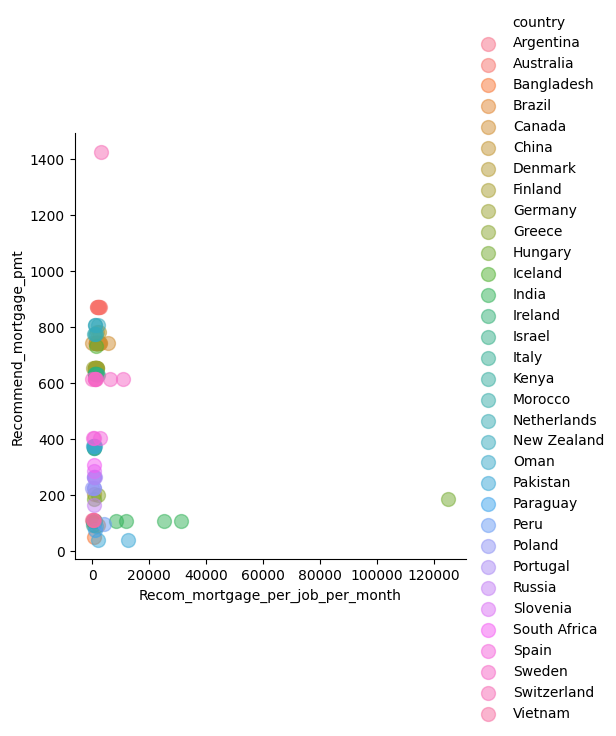

In [ ]:
#use hue argument to provide a factor variable

sns.lmplot(x='Recom_mortgage_per_job_per_month',
            y='Recommend_mortgage_pmt',data=filter_software, 
            fit_reg=False, 
            hue='country',
            scatter_kws={"alpha": 0.5, 's':100})

plt.show()